# Music Genre Based Playlist Generator - Phase2

By Gautham Santhosh K(AM.EN.U4CSE19121)

DATASET: https://www.kaggle.com/cnic92/spotify-past-decades-songs-50s10s?select=2010.csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('modifiedDataset2000.csv')

In [ ]:
data=data.drop(['Unnamed: 0'],axis = 1)

In [ ]:
data=data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 1 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PC1        99 non-null     float64
 1   PC2        99 non-null     float64
 2   PC3        99 non-null     float64
 3   top genre  99 non-null     float64
dtypes: float64(4)
memory usage: 3.9 KB


In [ ]:
from sklearn.model_selection import train_test_split  
arr=data.values
X=arr[:,0:3]
Y=arr[:,3]
Y=Y.astype('int')
X=X.astype('float')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier  

classifier = KNeighborsClassifier(n_neighbors=4)  
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


from sklearn.metrics import accuracy_score
knn_accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",knn_accuracy)

Accuracy: 0.25


In [ ]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
 
# model accuracy for X_test 
accuracy = svm_model_linear.score(X_test, y_test)
 
svm_accuracy=accuracy_score(y_test,svm_predictions)
print("Accuracy:",svm_accuracy)

Accuracy: 0.45


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

predicted = model.predict(X_test)
logistic_accuracy=accuracy_score(y_test, predicted)
print("Accuracy:",logistic_accuracy)

Accuracy: 0.4


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
tree.fit(X_train, y_train)
pred = tree.predict(X_test)
tree_accuracy=accuracy_score(y_test, pred)
print("Accuracy:",tree_accuracy)

Accuracy: 0.15


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_predict =gnb.predict(X_test)
gnb_accuracy=accuracy_score(y_test, gnb_predict)
print("Accuracy:",gnb_accuracy)

Accuracy: 0.35


In [ ]:
Accuracy=[]
Algorithm=[]
Accuracy.append(knn_accuracy)
Algorithm.append("KNN")
Accuracy.append(svm_accuracy)
Algorithm.append("SVM")
Accuracy.append(logistic_accuracy)
Algorithm.append("Logistic Regression")
Accuracy.append(tree_accuracy)
Algorithm.append("Decition Tree")
Accuracy.append(gnb_accuracy)
Algorithm.append("Naive Bayes")

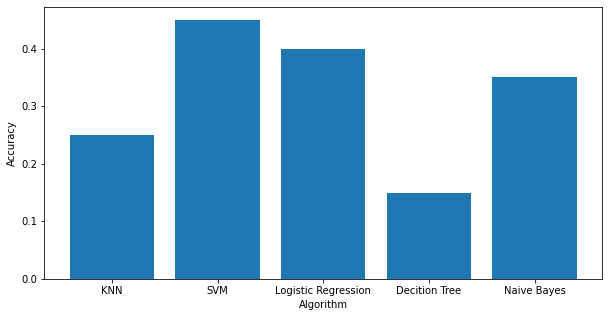

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(Algorithm, Accuracy)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
import math
import numpy as np
class NaiveBayes():
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.classes = np.unique(y)
        self.parameters = []
        for i, c in enumerate(self.classes):
            X_where_c = X[np.where(y == c)]
            self.parameters.append([])
            for col in X_where_c.T:
                parameters = {"mean": col.mean(), "var": col.var()}
                self.parameters[i].append(parameters)
                
                
    def likelihood(self, mean, var, x):
        m = 0.01
        gaussian = (1.0 / math.sqrt(2.0 * math.pi * var + m))*(math.exp(-(math.pow(x - mean, 2) / (2 * var + m))))
        return gaussian
    
    def prior(self, target):
        return np.mean(self.y == target)
    
    def predict(self, X):
        y_pred = []
        for j in X:
            posteriors = []
            for i, c in enumerate(self.classes):
                posterior = self.prior(c)
                for feature_value, params in zip(j, self.parameters[i]):
                    likelihood = self.likelihood(params["mean"], params["var"], feature_value)
                    posterior *= likelihood
                posteriors.append(posterior)
            y_pred.append(self.classes[np.argmax(posteriors)])
        return y_pred

In [ ]:
nb = NaiveBayes()
nb.fit(X_train,y_train)
pred = nb.predict(X_test)

print("Accuracy: ",accuracy_score(y_test,pred))

Accuracy:  0.35
